In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os
from PIL import Image
import matplotlib.image as mpimg
import numpy as np

In [2]:
train_datagen = ImageDataGenerator (rescale = 1./255,
                                    shear_range = 0.2,
                                    rotation_range = 0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
training_set = train_datagen.flow_from_directory(directory = 'images/train', 
                                                 target_size= (48,48),
                                                 class_mode = 'categorical',
                                                 batch_size = 32, 
                                                 classes=['Angy', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

test_set = test_datagen.flow_from_directory(directory = 'images/validation', 
                                            target_size=(48, 48), 
                                            class_mode = 'categorical', 
                                            batch_size = 32, 
                                            classes=['Angy', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

Found 24828 images belonging to 7 classes.
Found 6110 images belonging to 7 classes.


In [4]:
classifier = Sequential()
classifier.add(Conv2D(filters=16, kernel_size=(2, 2), padding='valid', input_shape=(48, 48, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=32, kernel_size=(2, 2), padding='valid', input_shape=(48, 48, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=64, kernel_size=(2, 2), padding='valid', input_shape=(48, 48, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=7, activation='softmax'))

## Affichage du modèle
classifier.summary ()
##Phase d'entrainement du modèle
#Définition d'un callbacks permettant d'arrêter l'entraînement dès que l'on atteint une accuracy maximum
earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0.01, 
                          patience=5, 
                          mode='max', 
                          verbose=1, 
                          restore_best_weights = True)

classifier.compile(loss='categorical_crossentropy', optimizer ='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0

In [5]:
history = classifier.fit(training_set, epochs = 50, validation_data = test_set, callbacks = [earlystop])

Epoch 1/50
776/776 [==============================] - 25s 32ms/step - loss: 1.6616 - accuracy: 0.2756 - val_loss: 1.5953 - val_accuracy: 0.3103
Epoch 2/50
776/776 [==============================] - 26s 33ms/step - loss: 1.6094 - accuracy: 0.2971 - val_loss: 1.5516 - val_accuracy: 0.3432
Epoch 3/50
776/776 [==============================] - 26s 33ms/step - loss: 1.5787 - accuracy: 0.3132 - val_loss: 1.4786 - val_accuracy: 0.3768
Epoch 4/50
776/776 [==============================] - 27s 34ms/step - loss: 1.5448 - accuracy: 0.3346 - val_loss: 1.4245 - val_accuracy: 0.3879
Epoch 5/50
776/776 [==============================] - 27s 35ms/step - loss: 1.5060 - accuracy: 0.3610 - val_loss: 1.4089 - val_accuracy: 0.3972
Epoch 6/50
776/776 [==============================] - 27s 35ms/step - loss: 1.4596 - accuracy: 0.3903 - val_loss: 1.2965 - val_accuracy: 0.4789
Epoch 7/50
776/776 [==============================] - 27s 34ms/step - loss: 1.4222 - accuracy: 0.4140 - val_loss: 1.2645 - val_accuracy:

In [11]:
model_path = "./model.h5"
classifier.save(model_path)

In [2]:
classifier = load_model('./model.h5')

In [3]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.subplot(2,1,1)
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(acc, label = 'acc')
plt.plot(val_acc, label = 'val_acc')
plt.hlines(y = 0.85, xmin = 0, xmax=8, colors = 'red', label="85% d'accuracy")
plt.legend()
plt.show()

NameError: name 'history' is not defined

1/1 [==============================] - 0s 13ms/step


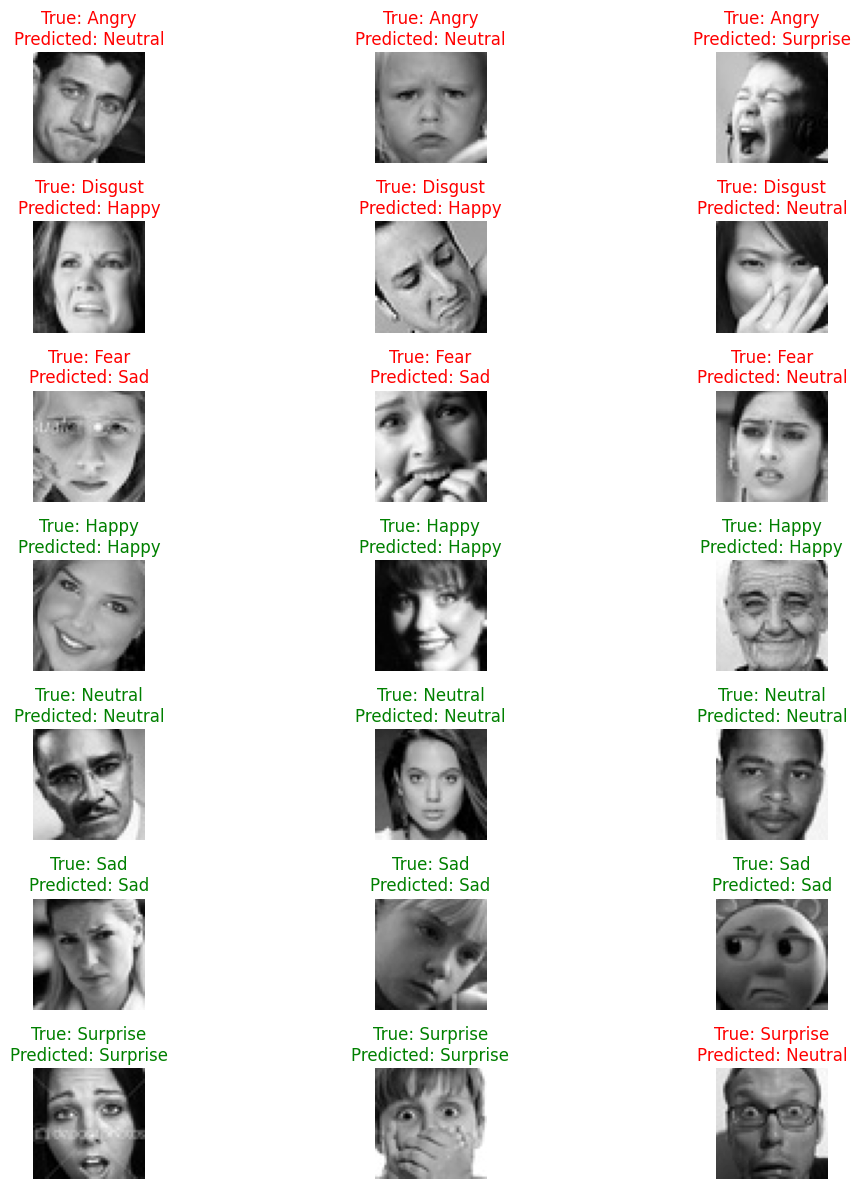

In [6]:
class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
root_dir = "./images/validation"

plt.figure(figsize=(12, 12))

num_images_per_class = 3  # Change this to 3 for 3 images per class

for class_name in class_names:
    class_dir = os.path.join(root_dir, class_name.lower())
    image_files = os.listdir(class_dir)
    random.shuffle(image_files)
    image_files = image_files[:num_images_per_class]

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        true_class_name = class_name

        test_image = load_img(image_path, target_size=(48, 48))
        test_image = img_to_array(test_image) / 255
        test_image = np.expand_dims(test_image, axis=0)
        predictions = classifier.predict(test_image)[0]

        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        correct_prediction = (predicted_class_name == true_class_name)

        title_color = 'green' if correct_prediction else 'red'

        plt.subplot(len(class_names), num_images_per_class, (class_names.index(class_name) * num_images_per_class) + i + 1)
        plt.axis('off')
        plt.title(f'True: {true_class_name}\nPredicted: {predicted_class_name}', color=title_color)
        img = Image.open(image_path)
        plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()


In [7]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# Charger le modèle pré-entraîné
  # Remplacer par le chemin de votre modèle
class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Initialiser la caméra
cap = cv2.VideoCapture(0)  # 0 est généralement la caméra par défaut
images_cam = []
try:
    while True:
        # Capturer image par image
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir l'image pour le modèle
        test_image = cv2.resize(frame, (48, 48))  # Redimensionner l'image comme votre modèle l'exige
        test_image = test_image[...,::-1]  # Convertir BGR en RGB si nécessaire
        images_cam.append(test_image)
        test_image = img_to_array(test_image) / 255
        test_image = np.expand_dims(test_image, axis=0)

        # Faire la prédiction
        predictions = classifier.predict(test_image)[0]
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        # Afficher le résultat sur l'image
        cv2.putText(frame, predicted_class_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Afficher l'image dans une fenêtre
        cv2.imshow('Sentiment Detection', frame)

        # Quitter avec la touche 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 26ms/step


2023-11-24 21:36:18.276 Python[18491:851003] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


1/1 [==============================] - 0s 16ms/step


In [8]:
len(images_cam)

40

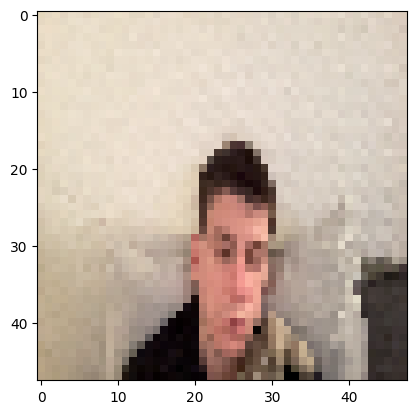

In [10]:
plt.imshow(images_cam[-1])

In [19]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# Charger le modèle pré-entraîné
classifier = load_model('model.h5')  # Remplacer par le chemin de votre modèle
class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Charger le détecteur de visages Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialiser la caméra
cap = cv2.VideoCapture(0)  # 0 est généralement la caméra par défaut

try:
    while True:
        # Capturer image par image
        ret, frame = cap.read()
        if not ret:
            break

        # Détecter les visages dans l'image
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            # Extraire la région du visage pour la prédiction
            face = frame[y:y+h, x:x+w]
            face = cv2.resize(face, (48, 48))
            face = face[...,::-1]  # Convertir BGR en RGB
            face = img_to_array(face) / 255
            face = np.expand_dims(face, axis=0)

            # Faire la prédiction
            predictions = classifier.predict(face)[0]
            predicted_class_index = np.argmax(predictions)
            predicted_class_name = class_names[predicted_class_index]

            # Dessiner un cadre autour du visage et afficher la prédiction
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(frame, predicted_class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        # Afficher l'image dans une fenêtre
        cv2.imshow('Sentiment Detection', frame)

        # Quitter avec la touche 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
except Exception as e:
    print(f"Une erreur est survenue : {e}")
    
finally:
    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 14ms/step
